Análise de Dados - Cursos plataforma de ensino online
A análise de dados é uma ferramenta essencial para impulsionar os negócios de uma empresa, e consequentemente, agregar valor.

Um dos profissionais necessários para a geração de valor para empresas, é o cientista/analista de dados. Este profissional é capaz de retirar insights de diversas fontes de dados.

Dito tudo isso, você, como cientista/analista de dados recebeu a missão de analisar dados de uma empresa ensino online de tecnologia. Seu principal objetivo, é através dos dados (disponibilizados na pasta compartilhada deste módulo), é o de responder algumas perguntas de negócios para auxiliar a empresa a aprimorar os seus serviços e produtos.

Detalhes da base de dados podem ser vistos na plataforma Kaggle pelo link

Para isso, use os conhecimentos obtidos neste módulo (e anteriores) para responder as seguintes questões:

Dicas:

Serão três diferentes bases de dados disponibilizadas na pasta do módulo, separadas por assunto (curso). Porém, todas elas contêm o mesmo cabeçalho. Logo, para que consiga responder as perguntas abaixo, unifique-as em um único DataFrame do pandas, e realize as análises.
Não é necessário criar gráficos/visualizações para apresentar os resultados de cada pergunta. Porém, se você estiver confortável para criá-los quando necessário, fique à vontade.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

business = pd.read_csv('udemy-business.csv')
design = pd.read_csv('udemy-design.csv')
music = pd.read_csv('udemy-music.csv')
web = pd.read_csv('udemy-web.csv')

geral = pd.concat([business, design, music, web])
geral

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,49798.0,Bitcoin or How I Learned to Stop Worrying and ...,https://www.udemy.com/bitcoin-or-how-i-learned...,0.0,65576.0,936.0,24.0,All Levels,0.56,8.0,2013-04-20T02:25:22Z,Business Finance
1,48841.0,Accounting in 60 Minutes - A Brief Introduction,https://www.udemy.com/accounting-in-60-minutes...,0.0,56659.0,4397.0,16.0,Beginner Level,0.95,1.5,2013-04-07T21:39:25Z,Business Finance
2,133536.0,Stock Market Investing for Beginners,https://www.udemy.com/the-beginners-guide-to-t...,0.0,50855.0,2698.0,15.0,All Levels,0.91,1.5,2013-12-25T19:53:34Z,Business Finance
3,151668.0,Introduction to Financial Modeling,https://www.udemy.com/financial-modeling-asimp...,0.0,29167.0,1463.0,8.0,All Levels,0.18,1.5,2014-05-27T16:22:16Z,Business Finance
4,648826.0,The Complete Financial Analyst Course 2017,https://www.udemy.com/the-complete-financial-a...,195.0,24481.0,2347.0,174.0,All Levels,0.37,10.0,2016-01-21T01:38:48Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1227578.0,Learning Path: The Road to Elasticsearch,https://www.udemy.com/learning-path-the-road-t...,200.0,50.0,5.0,60.0,Beginner Level,0.96,5.0,2017-05-29T17:56:24Z,Subject: Web Development
1201,1277924.0,Angular 4 Front To Back,https://www.udemy.com/angular-4-front-to-back/,40.0,44.0,0.0,68.0,All Levels,0.15,8.5,2017-07-06T15:04:55Z,Subject: Web Development
1202,1248172.0,Essentials of Spring 5.0 for Developers,https://www.udemy.com/essentials-of-spring-50-...,125.0,34.0,2.0,21.0,Beginner Level,0.46,1.5,2017-06-11T18:34:40Z,Subject: Web Development
1203,1250934.0,Display and analyze GIS data on the web with L...,https://www.udemy.com/display-and-analyze-gis-...,100.0,25.0,4.0,66.0,Beginner Level,0.67,12.5,2017-06-15T21:17:43Z,Subject: Web Development


1. Quantos cursos estão disponíveis na plataforma?

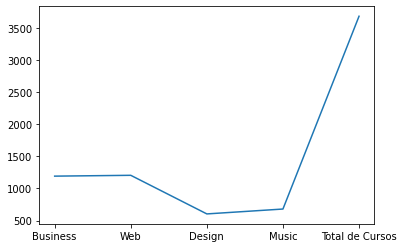

Nossa plataforma disponibiliza total de 3681 cursos


In [3]:
#calcular total de cursos e total de cursos por área
total_cursos = len(geral['course_id'])
cursos_business = len(business['course_id'])
cursos_web = len(web['course_id'])
cursos_design = len(design['course_id'])
cursos_music = len(music['course_id'])
#organizar os vetores para o gráfico
cursos = ['Business', 'Web', 'Design', 'Music', 'Total de Cursos']
qnt_cursos = [cursos_business, cursos_web, cursos_design, cursos_music, total_cursos]
#montagem do gráfico
plt.plot(cursos, qnt_cursos)
plt.show()
#resposta exata da pergunta 1
print(f'Nossa plataforma disponibiliza total de {total_cursos} cursos')

2. Quais e quantos são os cursos que abordam o assunto: JavaScript?

3. Qual é o preço médio (coluna *price*) dos cursos oferecidos na plataforma?

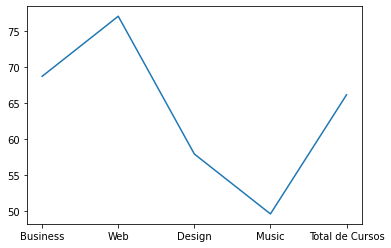

Nossos cursos tem preço médio de R$price    66.12
dtype: float64


In [5]:
preço_cursos = np.round(geral[['price']].mean(), 2)
preço_business = np.round(business[['price']].mean(), 2)
preço_web = np.round(web[['price']].mean(), 2)
preço_design = np.round(design[['price']].mean(), 2)
preço_music = np.round(music[['price']].mean(), 2)

preços = ['Business', 'Web', 'Design', 'Music', 'Total de Cursos']
preços_cursos = [preço_business, preço_web, preço_design, preço_music, preço_cursos]

plt.plot(preços, preços_cursos)
plt.show()

preço_medio = preço_cursos
print(f'Nossos cursos tem preço médio de R${preço_medio}')

4. Quais são os cinco cursos com maior número de inscritos (coluna *num_subscribers*)?

5. Dos cinco cursos mais populares em termos de inscritos, mostre o **rate médio**, **máximo** e **mínimo** de cada um deles.

6. Apresente os dez cursos mais visualizados na plataforma.

7. A partir dos dez cursos mais vistos, mostre:
1) qual tem o maior número de inscritos;
2) qual tem o maior **rate** (avaliação do curso).

In [6]:
#1) qual tem o maior número de inscritos;

In [7]:
#2) qual tem o maior **rate** (avaliação do curso).

8. Dos cursos listados na base de dados, qual tem maior duração em horas?

In [17]:
duracao_cursos = geral['content_duration'].max()
curso_maior_duracao = geral[geral['content_duration'] == duracao_cursos]
curso_maior_duracao
print(f'''Nosso curso de maior duração é o
"The Complete Figure Drawing Course HD"
com duração de {duracao_cursos} horas.''')

Nosso curso de maior duração é o
"The Complete Figure Drawing Course HD"
com duração de 78.5 horas!


9. Dos cursos listados na base de dados, qual tem o maior número de aulas (*lectures*)?

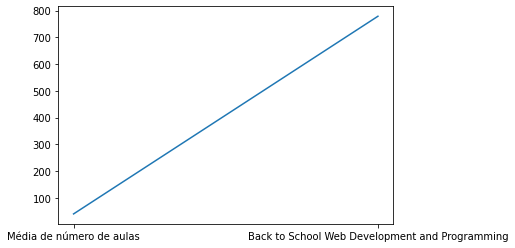

Nosso curso com maior número de aulas é o
"Back to School Web Development and Programming"
com 779.0 aulas.


In [37]:
media_num_aulas = geral['num_lectures'].mean()
maior_num_aulas = geral['num_lectures'].max()
curso_maior_num_aulas = geral[geral['num_lectures'] == maior_num_aulas]
media_num_aulas
curso_maior_num_aulas

aulas = ['Média de número de aulas', 'Back to School Web Development and Programming']
qnt_aulas = [media_num_aulas, maior_num_aulas]

plt.plot(aulas, qnt_aulas)
plt.show()

print(f'''Nosso curso com maior número de aulas é o
"Back to School Web Development and Programming"
com {maior_num_aulas} aulas.''')

10. Apresente o número (contagem) de cursos agrupados por nível (coluna *level*).

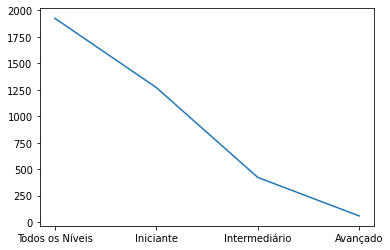

Possuímos 4 níveis de cursos:
- Iniciante, com 1271 cursos;
- Intermediário, com 422 cursos;
- Avançado, com 58 cursos;
- Para todos, com 1925 cursos;
Totalizando 3681 cursos


In [53]:
agrupamento = geral.groupby(by='level').count().reset_index()
agrupamento

niveis = ['Todos os Níveis', 'Iniciante', 'Intermediário', 'Avançado']
valores = [1925, 1271, 422, 58]

plt.plot(niveis, valores)
plt.show()

print(f'''Possuímos 4 níveis de cursos:
- Iniciante, com 1271 cursos;
- Intermediário, com 422 cursos;
- Avançado, com 58 cursos;
- Para todos, com 1925 cursos;
Totalizando 3681 cursos''')

11. Quais são os cursos mais recentes contidos na base de dados?

12. Apresente o número (contagem) de cursos agrupados por nível (coluna *level*) e por assunto (coluna *subject*).


13. Disponibilize suas análises em um repositório do Github e compartilhe o link abaixo.

14. Crie uma conta no <a href="https://www.kaggle.com/datasets/thedevastator/udemy-courses-revenue-generation-and-course-anal">Kaggle</a> e crie um Notebook com as análises feitas neste projeto. A ideia aqui, é que você comece a criar um portfólio de análise de dados na plataforma :)